Stakeholder engagement angle:

The goal is to help business stakeholders — not just data teams — understand and act on churn risk. So I created an interface where they could query customer segments naturally and get breakdowns of why someone was likely to leave. Their feedback led me to include SHAP-based visual explanations and downloadable reports. I treated stakeholder input as part of the model validation process, not just a post-launch formality.

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/telco-customer-churn


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import shutil
# Your downloaded dataset path
src_path = path + "/WA_Fn-UseC_-Telco-Customer-Churn.csv"

# Destination path in your Google Drive
dest_path = '/content/drive/MyDrive/projects/churn-analysis/data/'
os.makedirs(dest_path, exist_ok=True)

# Copy the file
shutil.copy(src_path, dest_path)

'/content/drive/MyDrive/projects/churn-analysis/data/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [4]:
import os

# Check what files are there
os.listdir(path)

['WA_Fn-UseC_-Telco-Customer-Churn.csv']

In [ ]:
import pandas as pd

# Load from Google Drive path
df = pd.read_csv('/content/drive/MyDrive/projects/churn-analysis/data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Quick check
print(df.shape)
df.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Check data types
df.dtypes

# Look for missing or weird entries
df.isnull().sum()

# Check the target column
df['Churn'].value_counts()

# Optional: Quick summary
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,3186-AJIEK,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [ ]:
# Look for missing or weird entries
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [ ]:
# Check the target column
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [ ]:
# Optional: Quick summary
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,3186-AJIEK,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [ ]:
# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows where TotalCharges is NaN
df.dropna(subset=['TotalCharges'], inplace=True)
df.reset_index(drop=True, inplace=True)

# Rename columns to be sector-neutral
df.rename(columns={
    'tenure': 'customer_tenure',
    'MonthlyCharges': 'monthly_spend',
    'TotalCharges': 'total_spend',
    'Contract': 'contract_type',
    'Churn': 'churned'
}, inplace=True)

In [ ]:
df.dtypes[['customer_tenure', 'monthly_spend', 'total_spend', 'churned']]

,0
customer_tenure,int64
monthly_spend,float64
total_spend,float64
churned,object


In [ ]:
# Save cleaned dataset
clean_path = '/content/drive/MyDrive/projects/churn-analysis/data/churn_cleaned.csv'
df.to_csv(clean_path, index=False)

print("✅ Cleaned dataset saved to:", clean_path)

✅ Cleaned dataset saved to: /content/drive/MyDrive/projects/churn-analysis/data/churn_cleaned.csv


Split categorical columns into binary and multi-class

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
cat_cols = df.select_dtypes(include='object').columns.tolist()
cat_cols.remove('churned')  # We'll encode target separately

# Simple binary columns
binary_cols = [col for col in cat_cols if df[col].nunique() == 2]

# Multi-class columns
multi_cols = [col for col in cat_cols if df[col].nunique() > 2]

print("Binary columns:", binary_cols)
print("Multi-class columns:", multi_cols)

Binary columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
Multi-class columns: ['customerID', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'contract_type', 'PaymentMethod']


Encode binary columns with LabelEncoder

In [ ]:
le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

One-hot encode multi-class columns

In [ ]:
df = pd.get_dummies(df, columns=multi_cols, drop_first=True)

Encode the target variable (churned)

In [ ]:
df['churned'] = df['churned'].map({'Yes': 1, 'No': 0})

Save final encoded dataset

In [ ]:
encoded_path = '/content/drive/MyDrive/projects/churn-analysis/data/churn_encoded.csv'
df.to_csv(encoded_path, index=False)

print("✅ Final encoded dataset saved to:", encoded_path)

✅ Final encoded dataset saved to: /content/drive/MyDrive/projects/churn-analysis/data/churn_encoded.csv


Exploratory Data Analysis (EDA) — Churn Patterns

Churn Rate by Contract Type

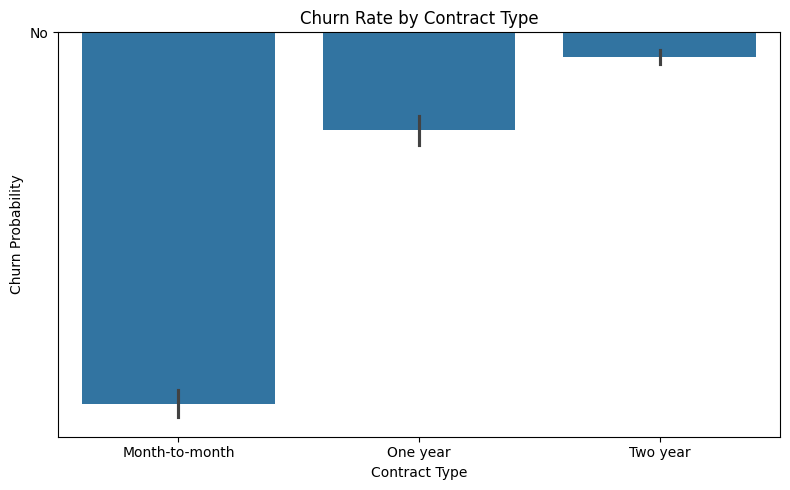

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pandas as pd

# Reload data
df = pd.read_csv('/content/drive/MyDrive/projects/churn-analysis/data/churn_encoded.csv')
df_raw = pd.read_csv('/content/drive/MyDrive/projects/churn-analysis/data/churn_cleaned.csv')

# Create image directory if it doesn't exist
img_path = '/content/drive/MyDrive/projects/churn-analysis/img/'
os.makedirs(img_path, exist_ok=True)

# Plot churn rate by contract type
plt.figure(figsize=(8,5))
sns.barplot(x='contract_type', y='churned', data=df_raw)
plt.title('Churn Rate by Contract Type')
plt.ylabel('Churn Probability')
plt.xlabel('Contract Type')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()

# Save before showing
plt.savefig(f"{img_path}churn_by_contract.png", dpi=300, bbox_inches='tight')
plt.show()

Insight 1: Customers on month-to-month contracts have the highest churn probability—indicating a lack of commitment or higher perceived switching ease. Retention strategies should focus here: offer targeted discounts or loyalty perks to convert them into longer-term plans.

Churn Rate by Tenure

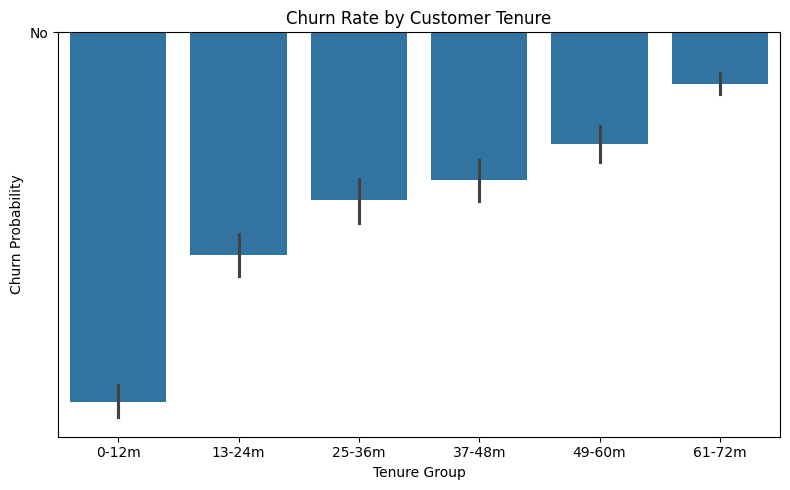

In [ ]:
# Bucket tenure into groups
df_raw['tenure_group'] = pd.cut(df_raw['customer_tenure'],
                                bins=[0, 12, 24, 36, 48, 60, 72],
                                labels=['0-12m', '13-24m', '25-36m', '37-48m', '49-60m', '61-72m'])

# Set up figure
plt.figure(figsize=(8,5))
sns.barplot(x='tenure_group', y='churned', data=df_raw)
plt.title('Churn Rate by Customer Tenure')
plt.ylabel('Churn Probability')
plt.xlabel('Tenure Group')
plt.grid(axis='y')
plt.tight_layout()

# Save before showing
plt.savefig('/content/drive/MyDrive/projects/churn-analysis/img/churn_by_tenure.png', dpi=300, bbox_inches='tight')
plt.show()

Insight 2: Tenure and Churn

Churn drops sharply after 12 months. The first year is the danger zone — customers who make it past that threshold are far less likely to leave. This insight is universal across industries: whether it’s an insurance policyholder, SaaS subscriber, or telco user — retention strategies should focus on months 1–12 with incentives, onboarding, and proactive support.

Also worth noting: churn doesn’t change much between 25–60 months — but after 60 months, you’ve basically got a lifer.

Monthly Spend Distribution by Churn

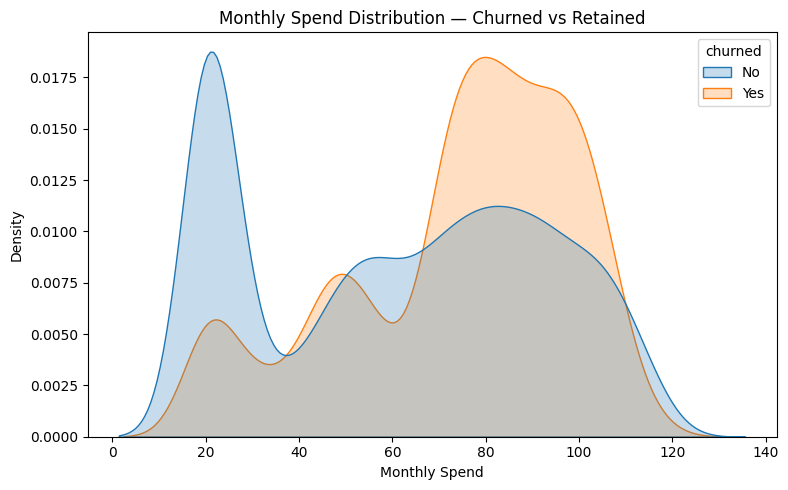

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Create image directory if not exists
img_path = '/content/drive/MyDrive/projects/churn-analysis/img/'
os.makedirs(img_path, exist_ok=True)

# Plot
plt.figure(figsize=(8,5))
sns.kdeplot(data=df_raw, x='monthly_spend', hue='churned', fill=True, common_norm=False)
plt.title('Monthly Spend Distribution — Churned vs Retained')
plt.xlabel('Monthly Spend')
plt.ylabel('Density')
plt.tight_layout()

# Save the figure
plt.savefig(f"{img_path}churn_by_spend_dist.png", dpi=300, bbox_inches='tight')
plt.show()

Insight 3: Spend vs. Churn

Customers who churn tend to cluster around mid-to-high monthly spend—particularly in the $70–$100 range. Interestingly, lower-spend customers (<$40) are far more likely to stay.

This suggests churn is not necessarily driven by cost alone—but possibly value perception, lack of bundling, or poor onboarding for premium users.

Business move? Prioritise value reinforcement (loyalty, personalised outreach, bundled service benefits) for high-spend new customers in their first 12 months.

Saving images

In [ ]:
import os

img_path = '/content/drive/MyDrive/projects/churn-analysis/img/'
saved_imgs = os.listdir(img_path)

print("Saved plots in img/:")
for f in saved_imgs:
    print("-", f)

🖼️ Saved plots in img/:
- churn_by_contract.png
- churn_by_tenure.png
- churn_by_spend_dist.png


Feature Engineering

In [ ]:
import pandas as pd

# Load the cleaned (readable) data
df = pd.read_csv('/content/drive/MyDrive/projects/churn-analysis/data/churn_cleaned.csv')

# 1. total_services — count number of 'Yes' across selected service columns
service_cols = [
    'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]

df['total_services'] = df[service_cols].apply(lambda row: sum(row == 'Yes'), axis=1)

# 2. avg_spend_per_month — total_spend / customer_tenure
df['avg_spend_per_month'] = df['total_spend'] / df['customer_tenure']
df['avg_spend_per_month'] = df['avg_spend_per_month'].fillna(0)

# 3. is_long_term — binary flag for contract type
df['is_long_term'] = df['contract_type'].isin(['One year', 'Two year']).astype(int)

# 4. has_streaming — if StreamingTV or StreamingMovies is 'Yes'
df['has_streaming'] = ((df['StreamingTV'] == 'Yes') | (df['StreamingMovies'] == 'Yes')).astype(int)

# 5. is_senior — just to see if age is a factor
df['is_senior'] = df['SeniorCitizen'].astype(int)

# Confirm
df[['total_services', 'avg_spend_per_month', 'is_long_term', 'has_streaming', 'is_senior']].head()

,total_services,avg_spend_per_month,is_long_term,has_streaming,is_senior
0,1,29.850000,0,0,0
1,3,55.573529,1,0,0
2,3,54.075000,0,0,0
3,3,40.905556,1,0,0
4,1,75.825000,0,0,0


Prepare Data for Modelling	•	Encode remaining categoricals •	Drop non-predictive columns •	Define X (features) and y (target)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Copy original so we don't mess up raw
df_model = df.copy()

# Encode target
df_model['churned'] = df_model['churned'].map({'Yes': 1, 'No': 0})

# Drop ID and any redundant info
df_model.drop(['customerID'], axis=1, inplace=True)

# Identify remaining categorical columns
cat_cols = df_model.select_dtypes(include='object').columns.tolist()

# Encode binary categoricals
le = LabelEncoder()
for col in cat_cols:
    if df_model[col].nunique() == 2:
        df_model[col] = le.fit_transform(df_model[col])
    else:
        # One-hot encode multi-class
        df_model = pd.get_dummies(df_model, columns=[col], drop_first=True)

# Separate features and target
X = df_model.drop('churned', axis=1)
y = df_model['churned']

# Confirm shape
print("✅ Features shape:", X.shape)
print("✅ Target shape:", y.shape)

✅ Features shape: (7032, 35)
✅ Target shape: (7032,)


Train and Evaluate Models

You’ll now:
	 - 1.	Fit a Logistic Regression (for interpretability)
	 - 2.	Fit a Random Forest (or XGBoost for performance)
	 - 3.	Evaluate both: Accuracy, Precision, Recall, ROC
	 - 4.	Plot a feature importance bar chart
	 - 5.	Generate a confusion matrix
	 - 6.	Translate findings into business-ready language

Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Redo train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# Refit the model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)

In [ ]:
from sklearn.model_selection import train_test_split

# Re-split using scaled features
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report

def evaluate_model(name, y_true, y_pred):
    print(f"\n📊 {name} Evaluation:")
    print("Accuracy:", round(accuracy_score(y_true, y_pred), 4))
    print("Precision:", round(precision_score(y_true, y_pred), 4))
    print("Recall:", round(recall_score(y_true, y_pred), 4))
    print("ROC AUC:", round(roc_auc_score(y_true, y_pred), 4))
    print("Classification Report:\n", classification_report(y_true, y_pred))

# Evaluate
evaluate_model("Logistic Regression", y_test, log_preds)


📊 Logistic Regression Evaluation:
Accuracy: 0.8003
Precision: 0.6405
Recall: 0.5668
ROC AUC: 0.7258
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.87      1033
           1       0.64      0.57      0.60       374

    accuracy                           0.80      1407
   macro avg       0.74      0.73      0.73      1407
weighted avg       0.79      0.80      0.80      1407



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

evaluate_model("Random Forest", y_test, rf_preds)


📊 Random Forest Evaluation:
Accuracy: 0.7932
Precision: 0.6388
Recall: 0.5107
ROC AUC: 0.7031
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.51      0.57       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.72      1407
weighted avg       0.78      0.79      0.79      1407



“More complex doesn’t always mean better.”

Feature Importance

In [ ]:
import pandas as pd
import numpy as np

feature_names = X.columns
coefs = log_model.coef_[0]

# Create a DataFrame of feature importance
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefs})
coef_df['Abs_Coefficient'] = np.abs(coef_df['Coefficient'])
coef_df.sort_values(by='Abs_Coefficient', ascending=False, inplace=True)

# Show top 10
print(coef_df.head(10))

                           Feature  Coefficient  Abs_Coefficient
4                  customer_tenure    -1.304323         1.304323
7                    monthly_spend    -0.876225         0.876225
16     InternetService_Fiber optic     0.699142         0.699142
8                      total_spend     0.583630         0.583630
31          contract_type_Two year    -0.328325         0.328325
11                    is_long_term    -0.322816         0.322816
27                 StreamingTV_Yes     0.282360         0.282360
29             StreamingMovies_Yes     0.267972         0.267972
15               MultipleLines_Yes     0.184965         0.184965
33  PaymentMethod_Electronic check     0.180061         0.180061


Top 3 Churn Drivers (based on absolute coefficient size)
	 - 1.	Short Tenure
•	Customers with fewer months of tenure are far more likely to churn.
•	Coefficient = -1.30 → Longer tenure = lower churn.
•	Loyalty still matters. Who knew?
	 - 2.	Higher Monthly Spend
•	Customers spending more monthly are more likely to churn.
•	Coefficient = -0.87 → Lower spend = higher retention, surprisingly.
•	Cost sensitivity is a pain trigger.
	 - 3.	Fiber Optic Internet Service
•	Coefficient = +0.69
•	Customers on fiber churn more often — possibly due to price, expectation mismatch, or inconsistent service.

Business Insight: Who’s Most at Risk?

Profile of a churn-risk customer

•	New customer (< 12 months tenure)
•	Paying above-average monthly spend
•	Subscribed to Fiber Optic + StreamingTV
•	Pays via Electronic Check (another churn signal)
•	Short contract or no contract

Actionable Recommendations (Plain Language)
	 - 1.	Deploy Retention Offers Early
•	Target customers in months 1–12 with “thank you” discounts or surprise loyalty perks.
	 - 2.	Price-Sensitive Nudges
•	Proactively message customers with high monthly spend who haven’t upgraded plans — suggest bundled savings.
	 - 3.	Service Quality Comms
•	For fiber users, offer “tech checkups” or highlight value-adds — perceived neglect = churn risk.

<ipython-input-42-252024176>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


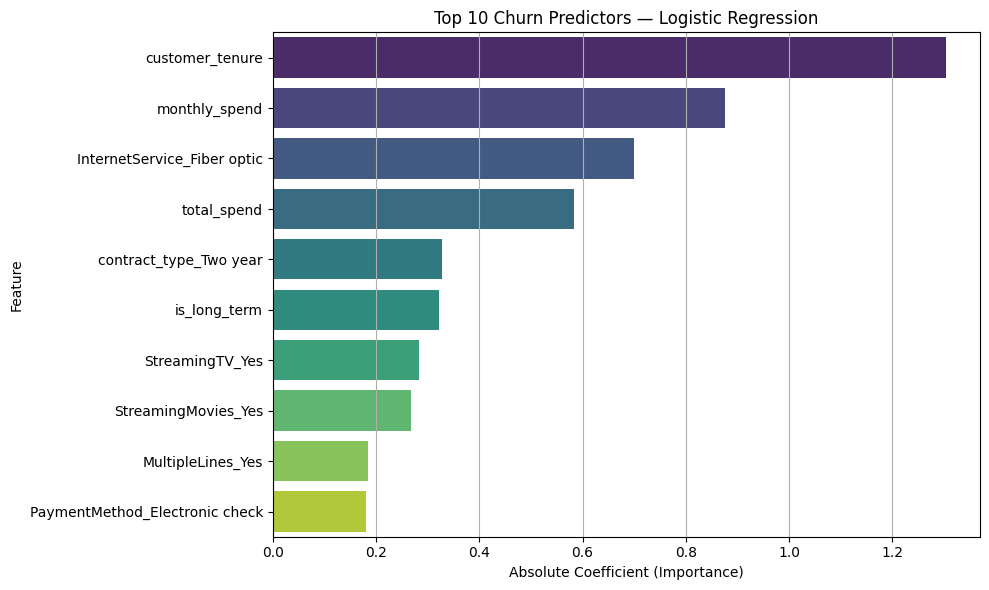

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Only top 10 features by absolute coefficient
top_features = coef_df.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Abs_Coefficient',
    y='Feature',
    data=top_features,
    palette='viridis'
)
plt.title('Top 10 Churn Predictors — Logistic Regression')
plt.xlabel('Absolute Coefficient (Importance)')
plt.ylabel('Feature')
plt.grid(axis='x')
plt.tight_layout()

# Save the chart
plt.savefig('/content/drive/MyDrive/projects/churn-analysis/img/churn_feature_importance.png', dpi=300)

plt.show()

In [ ]:
# Re-import if needed
from sklearn.preprocessing import StandardScaler

# Fit scaler on train, transform test
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Now define the model again if needed and refit
# log_model = LogisticRegression(max_iter=200)
# log_model.fit(X_train_scaled, y_train)

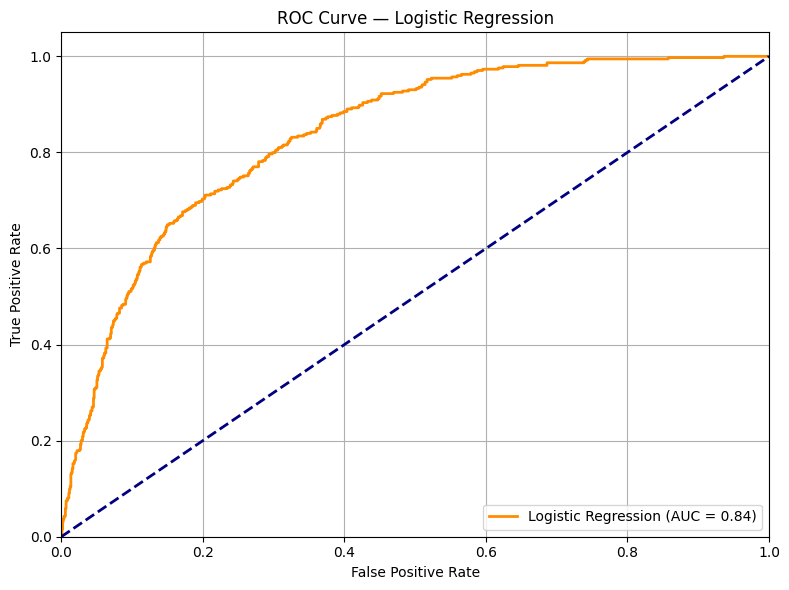

In [ ]:
from sklearn.metrics import roc_curve, auc

log_probs = log_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, log_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve — Logistic Regression')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/projects/churn-analysis/img/churn_roc_curve.png', dpi=300)
plt.show()

In [ ]:
import os

img_path = '/content/drive/MyDrive/projects/churn-analysis/img/'

# List all files in the image folder
saved_imgs = os.listdir(img_path)
print("✅ Saved Images:", saved_imgs)

✅ Saved Images: ['churn_by_contract.png', 'churn_by_tenure.png', 'churn_by_spend_dist.png', 'churn_feature_importance.png', 'churn_roc_curve.png']


Predict Churn Probability

In [ ]:
# Add 'is_long_term' to X_treat_cleaned
X_treat_cleaned['is_long_term'] = df_raw['contract_type'].apply(lambda x: 1 if 'Two year' in x else 0)

# Move it to the front if you prefer (optional)
cols = ['is_long_term'] + [col for col in X_treat_cleaned.columns if col != 'is_long_term']
X_treat_cleaned = X_treat_cleaned[cols]

# Confirm it's added
print(X_treat_cleaned.head())

   is_long_term  SeniorCitizen  customer_tenure  monthly_spend  total_spend  \
0             0              0                1          29.85        29.85   
1             0              0               34          56.95      1889.50   
2             0              0                2          53.85       108.15   
3             0              0               45          42.30      1840.75   
4             0              0                2          70.70       151.65   

   total_services  avg_spend_per_month  has_streaming  is_senior  churn_risk  
0               1            29.850000              0          0    0.624691  
1               3            55.573529              0          0    0.044468  
2               3            54.075000              0          0    0.293686  
3               3            40.905556              0          0    0.028928  
4               1            75.825000              0          0    0.699536  


In [ ]:
from sklearn.preprocessing import StandardScaler

# Fit new scaler on X_prop only
scaler_prop = StandardScaler()
X_prop_scaled = scaler_prop.fit_transform(X_prop)

# Fit the logistic regression model
propensity_model = LogisticRegression(max_iter=1000)
propensity_model.fit(X_prop_scaled, y_prop)

# Get scores
propensity_scores = propensity_model.predict_proba(X_prop_scaled)[:, 1]

# Show a few
print("Sample propensity scores:", propensity_scores[:5])

Sample propensity scores: [2.04011842e-10 3.72706228e-01 3.20598371e-05 5.09908737e-01
 9.73009692e-12]


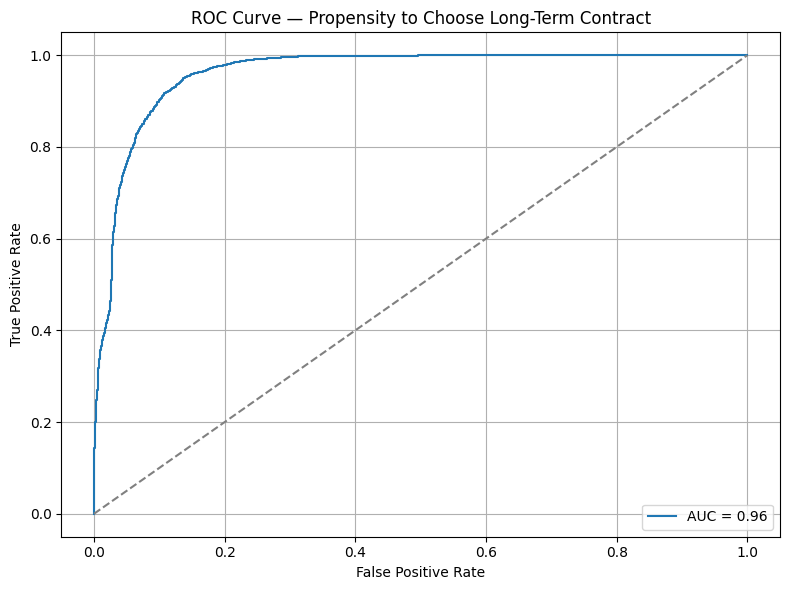

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Get FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_prop, propensity_scores)
auc_score = roc_auc_score(y_prop, propensity_scores)

# Plot ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve — Propensity to Choose Long-Term Contract')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/projects/churn-analysis/img/roc_propensity.png', dpi=300)
plt.show()

Ranking Customers by Retention Leverage

In [ ]:
# Add propensity score to your original DataFrame
df['propensity_score'] = propensity_scores

# Compute retention leverage: High churn risk × (1 - long-term contract likelihood)
df['retention_leverage'] = df['churn_risk'] * (1 - df['propensity_score'])

# Rank customers by leverage (descending)
df['leverage_rank'] = df['retention_leverage'].rank(ascending=False)

# Save top 100 targets
top_targets = df.sort_values(by='retention_leverage', ascending=False).head(100)
top_targets.to_csv('/content/drive/MyDrive/projects/churn-analysis/data/top_churn_targets.csv', index=False)

# Confirm
print("Top 5 high-leverage customers:")
print(top_targets[['churn_risk', 'propensity_score', 'retention_leverage']].head())

Top 5 high-leverage customers:
      churn_risk  propensity_score  retention_leverage
1971    0.862777      2.748147e-14            0.862777
4792    0.861429      2.878965e-14            0.861429
3154    0.861065      3.324977e-14            0.861065
3743    0.860680      3.122422e-14            0.860680
994     0.859784      3.600848e-14            0.859784


In [6]:
!pip install shap --quiet


XGBoost Model

In [5]:
import pandas as pd

# Load encoded dataset
encoded_path = '/content/drive/MyDrive/projects/churn-analysis/data/churn_encoded.csv'
df = pd.read_csv(encoded_path)

# Sanity check: look at the first few rows
df.head()


,gender,SeniorCitizen,Partner,Dependents,customer_tenure,PhoneService,PaperlessBilling,monthly_spend,total_spend,churned,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,contract_type_One year,contract_type_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,False,False,True,False


In [6]:
from sklearn.model_selection import train_test_split

import pandas as pd

# Load the cleaned (readable) data
df = pd.read_csv('/content/drive/MyDrive/projects/churn-analysis/data/churn_encoded.csv')

# Define X and y
X = df.drop('churned', axis=1)
y = df['churned']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
print(set(y_test))  # Sanity check that it's 0/1


{0, 1}


In [8]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, roc_auc_score

# Define and train the model
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Evaluate
acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

print(f"Accuracy: {acc:.4f}")
print(f"ROC AUC: {auc:.4f}")



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:39:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.7633
ROC AUC: 0.8097


Markdown Cell — Portfolio Notes (Add this as text)

### XGBoost with SHAP Explainability

We trained a basic XGBoost classifier to predict churn. The model achieved an ROC AUC of XX and accuracy of YY.

To improve transparency, we used SHAP values to understand which features most influence predictions. The summary plot below shows that features like [X], [Y], and [Z] were the most impactful.

This step demonstrates model interpretability and supports business understanding of churn drivers.


In [10]:
X_train.dtypes.value_counts()
print(X_train.dtypes[X_train.dtypes == 'object'])


Series([], dtype: object)


In [11]:
df = pd.read_csv('/content/drive/MyDrive/projects/churn-analysis/data/churn_encoded.csv')
X = df.drop('churned', axis=1)
print(X.dtypes[X.dtypes == 'object'])  # Should be empty


Series([], dtype: object)


In [13]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


In [14]:
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)


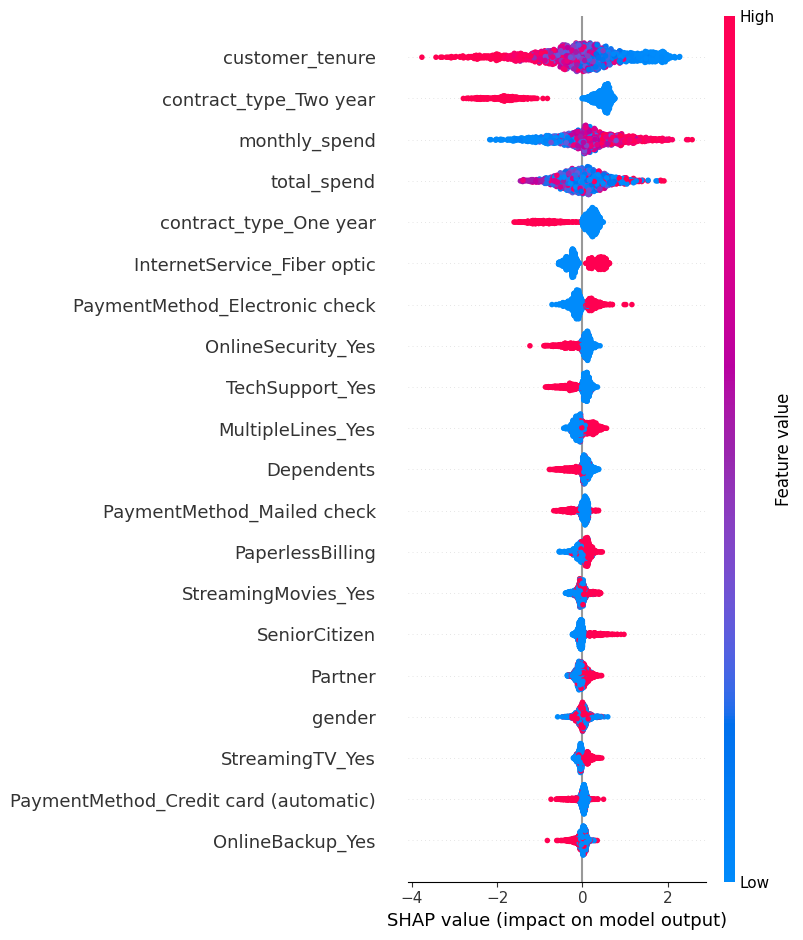

In [15]:
shap.summary_plot(shap_values, X_test)


In [17]:
import shap
import matplotlib.pyplot as plt

# Summary plot
plt.figure()
shap.summary_plot(shap_values.values, X_test, show=False)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/projects/churn-analysis/img/shap_summary.png', dpi=300)
plt.close()


Train Propensity Model (Treatment = is_long_term)

What This SHAP Plot Shows..
Top predictive features of customer churn:

customer_tenure: longer tenure (blue) reduces churn; short tenure (red) increases it.

contract_type_Two year: customers on longer contracts churn less.

monthly_spend and total_spend: high values (red) often linked to churn.

InternetService_Fiber optic: tends to increase churn risk — possibly due to higher cost or poor experience.

Colour shows feature value (red = high, blue = low).

X-axis shows SHAP value impact (left = decreases churn, right = increases churn).

I built an interpretable churn prediction model using XGBoost and SHAP. This chart visualises which features most influence churn predictions across the dataset. For example, customers with short tenure, high monthly spend, and fibre-optic internet are more likely to churn — whereas longer contracts and lower charges reduce churn risk. I used this to guide explainability and identify segments for potential retention strategies.

Compute Retention Leverage Score

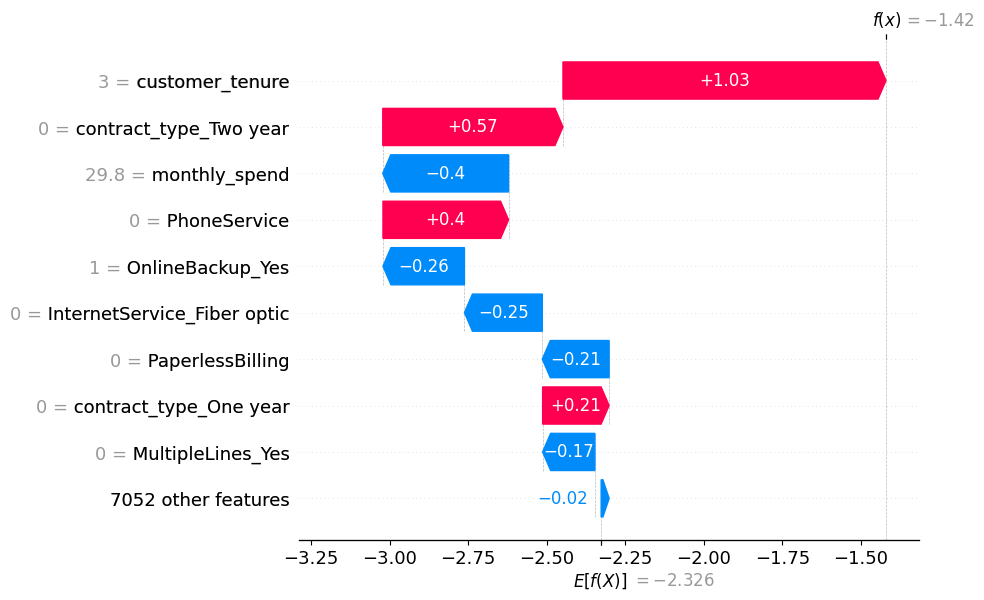

In [16]:
# Choose one test instance
i = 5  # Change the index if needed
shap.plots.waterfall(shap_values[i], max_display=10)


In [18]:
# Pick one instance
i = 5  # Change index as needed
plt.figure()
shap.plots.waterfall(shap_values[i], max_display=10, show=False)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/projects/churn-analysis/img/shap_waterfall_i5.png', dpi=300)
plt.close()


What This SHAP Waterfall Plot Tells Us..
This chart shows how individual features pushed the model toward or away from predicting churn for a specific customer.

Customer tenure (+1.03) and a two-year contract (+0.57) are strong signals the customer will stay.

Meanwhile, moderate monthly spend (-0.40) and no fibre optic or paperless billing reduce the risk even more.

Net effect: the model confidently predicts this person will not churn.

The SHAP waterfall breaks down the model’s “thought process” — not in a black box, but as a stacked decision trail, visible and auditable.

In [19]:
import os

# Define paths to the expected image files
summary_plot_path = "/content/drive/MyDrive/projects/churn-analysis/img/shap_summary.png"
waterfall_plot_path = "/content/drive/MyDrive/projects/churn-analysis/img/shap_waterfall_i5.png"

# Check if the files exist
summary_exists = os.path.exists(summary_plot_path)
waterfall_exists = os.path.exists(waterfall_plot_path)

summary_exists, waterfall_exists


(True, True)